In [1]:
import os
import torch.utils.data
import cv2
import tqdm
from dataloader import ColoringDataset, tensor2img
from unet_resblock import *
import matplotlib.pyplot as plt
import numpy as np

### Load best model

In [2]:
check_point = './checkpoints/Best_model_weight.pth'
use_cuda = True

model = ResAttdU_Net().cuda()
model.load_state_dict(torch.load(check_point))
# model.eval()

os.makedirs('outputs/predict', exist_ok=True)
os.makedirs('outputs/predict/bulk',exist_ok=True)
os.makedirs('outputs/predict/single',exist_ok=True)

## Single image Colorization

In [3]:
single_data_dir = './test_sample'

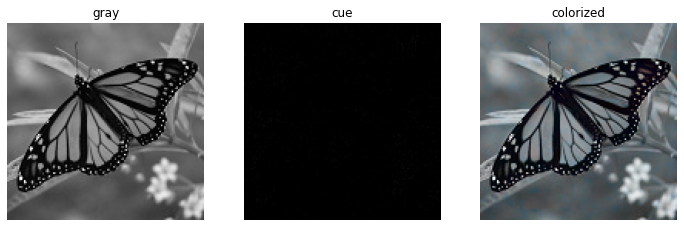

True

In [19]:
test_dataset = ColoringDataset(single_data_dir,128)
test_dataset.set_mode('testing')
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=False)

dataiter = iter(test_dataloader)
data = dataiter.next()
img_name = data["file_name"][0].split("_")[1].lstrip("0")

if use_cuda :
    l = data["l"].to('cuda')
    ab = data["gray"].to('cuda')
    filename = data["file_name"]
    cue = data["cue"].to('cuda')

gray_image = torch.cat((l, ab, cue), dim=1)
output_gray = model(gray_image)
out_gray_np = tensor2img(output_gray)
output_bgr = cv2.cvtColor(out_gray_np, cv2.COLOR_LAB2BGR)    
# preview prediction


grayx = cv2.imread(os.path.join(single_data_dir, "gray", img_name))
cuex = cv2.imread(os.path.join(single_data_dir, "cue", img_name))

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,3,1)
ax1.axis('off')
ax1.set_title('gray')
ax1.imshow(grayx)
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('cue')
ax2.axis('off')
ax2.imshow(cuex)
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('colorized')
ax3.axis('off')
ax3.imshow(cv2.cvtColor(output_bgr, cv2.COLOR_BGR2RGB))
plt.show()

fname = str(filename).replace("['", '').replace("']", '')  
cv2.imwrite('outputs/predict/single/'+str(fname), output_bgr)

### Colorization in Bulk

In [21]:
bulk_data_dir = './test_dataset'

In [22]:
test_dataset = ColoringDataset(bulk_data_dir,128)
test_dataset.set_mode('testing')
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=False)
print(len(test_dataloader))

12


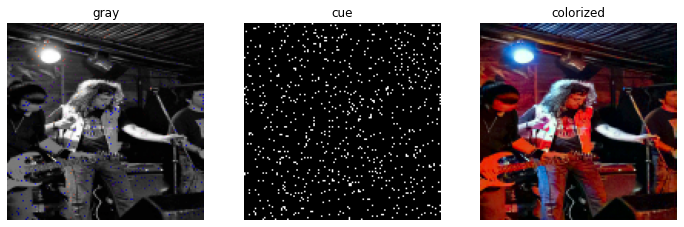

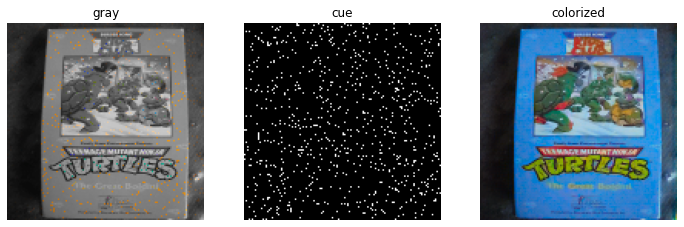

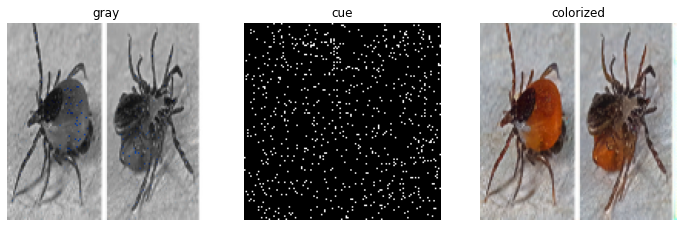

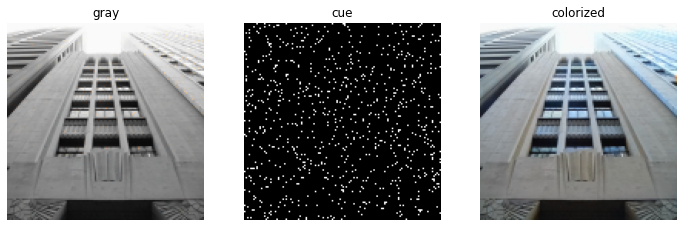

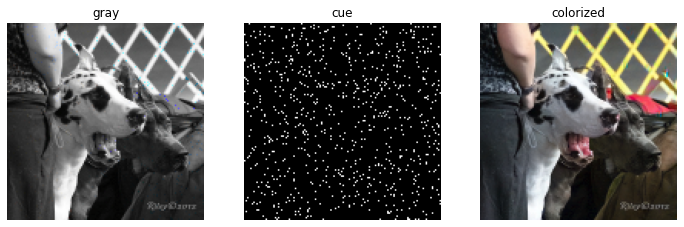

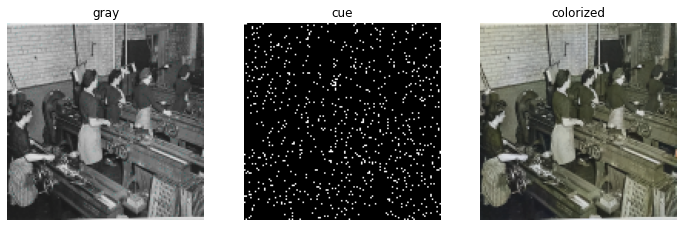

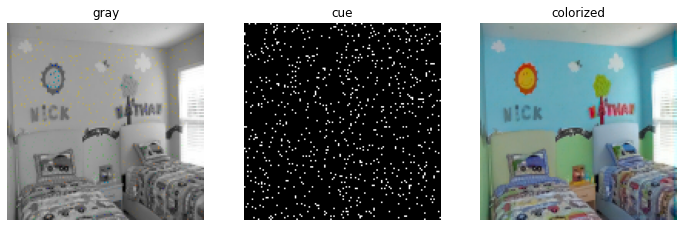

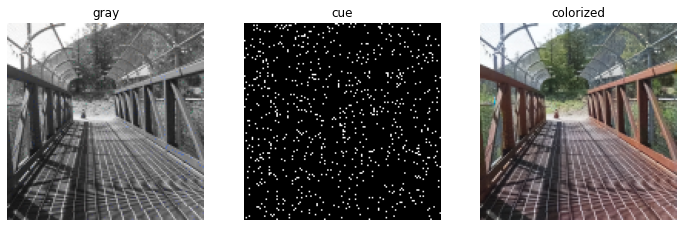

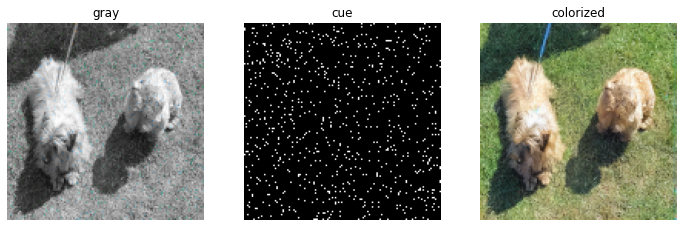

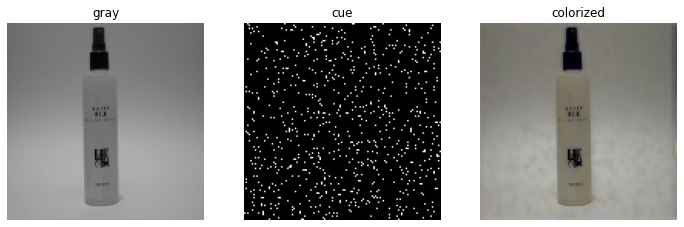

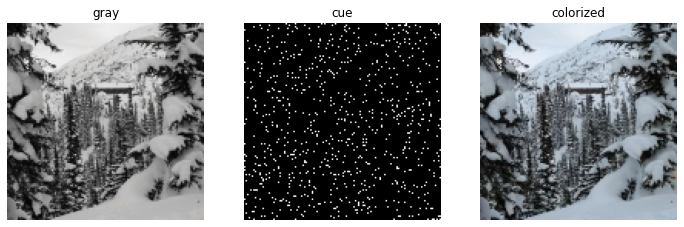

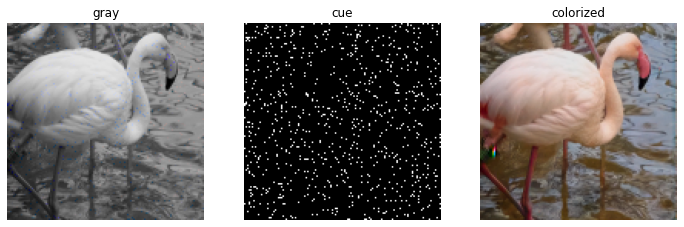

In [23]:
# try:
for i , data in enumerate(test_dataloader):
    img_name = data["file_name"][0].split("_")[1].lstrip("0")
    
    if use_cuda :
        l = data["l"].to('cuda')
        ab = data["gray"].to('cuda')
        filename = data["file_name"]
        cue = data["cue"].to('cuda')

    gray_image = torch.cat((l, ab, cue), dim=1)
    output_gray = model(gray_image)
    out_gray_np = tensor2img(output_gray)
    output_bgr = cv2.cvtColor(out_gray_np, cv2.COLOR_LAB2BGR)
    # preview images

    grayx = cv2.imread(os.path.join(bulk_data_dir, "gray", img_name))
    cuex = cv2.imread(os.path.join(bulk_data_dir, "cue", img_name))
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(1,3,1)
    ax1.axis('off')
    ax1.set_title('gray')
    ax1.imshow(grayx)
    ax2 = fig.add_subplot(1,3,2)
    ax2.set_title('cue')
    ax2.axis('off')
    ax2.imshow(cuex)
    ax3 = fig.add_subplot(1,3,3)
    ax3.set_title('colorized')
    ax3.axis('off')
    ax3.imshow(cv2.cvtColor(output_bgr, cv2.COLOR_BGR2RGB))

    plt.show()

    fname = str(filename).replace("['", '').replace("']", '')
    cv2.imwrite('outputs/predict/bulk/'+str(fname), output_bgr)
# except:
#     print("corrupted image")